In [23]:
import cirq
circuit = cirq.Circuit()
qq = cirq.LineQubit.range(6)
CCCZ = cirq.Z(qq[2]).controlled_by(qq[0], qq[1])

circuit.append(cirq.H.on_each(*qq))
circuit.append(CCCZ)
circuit

0: ───H───@───
          │
1: ───H───@───
          │
2: ───H───@───

3: ───H───────

4: ───H───────

5: ───H───────

In [16]:
qq[:2]

[cirq.LineQubit(0), cirq.LineQubit(1)]

In [7]:
from qiskit import QuantumCircuit
import numpy as np
#string
circuit = QuantumCircuit(2)
circuit.cz(0,1)
circuit.id(0)
circuit.draw()  

┌───┐
q_0: ─■─┤ I ├
      │ └───┘
q_1: ─■──────

In [1]:
# useful additional packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit_aer import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

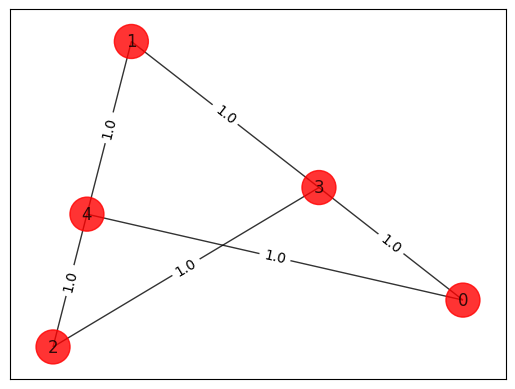

In [2]:
# Generating a graph of 4 nodes

n = 5  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 3, 1.0), (0, 4, 1.0),(1, 3, 1.0), (1, 4, 1.0),(2, 3, 1.0), (2, 4, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

In [3]:
# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)


[[0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]]


case = [0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0] cost = 2.0
case = [0, 1, 0, 0, 0] cost = 2.0
case = [1, 1, 0, 0, 0] cost = 4.0
case = [0, 0, 1, 0, 0] cost = 2.0
case = [1, 0, 1, 0, 0] cost = 4.0
case = [0, 1, 1, 0, 0] cost = 4.0
case = [1, 1, 1, 0, 0] cost = 6.0
case = [0, 0, 0, 1, 0] cost = 3.0
case = [1, 0, 0, 1, 0] cost = 3.0
case = [0, 1, 0, 1, 0] cost = 3.0
case = [1, 1, 0, 1, 0] cost = 3.0
case = [0, 0, 1, 1, 0] cost = 3.0
case = [1, 0, 1, 1, 0] cost = 3.0
case = [0, 1, 1, 1, 0] cost = 3.0
case = [1, 1, 1, 1, 0] cost = 3.0
case = [0, 0, 0, 0, 1] cost = 3.0
case = [1, 0, 0, 0, 1] cost = 3.0
case = [0, 1, 0, 0, 1] cost = 3.0
case = [1, 1, 0, 0, 1] cost = 3.0
case = [0, 0, 1, 0, 1] cost = 3.0
case = [1, 0, 1, 0, 1] cost = 3.0
case = [0, 1, 1, 0, 1] cost = 3.0
case = [1, 1, 1, 0, 1] cost = 3.0
case = [0, 0, 0, 1, 1] cost = 6.0
case = [1, 0, 0, 1, 1] cost = 4.0
case = [0, 1, 0, 1, 1] cost = 4.0
case = [1, 1, 0, 1, 1] cost = 2.0
case = [0, 0, 1, 1, 1] cost = 4.0
case = [1, 0, 

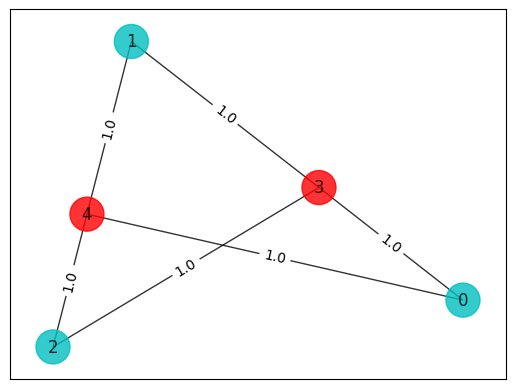

In [4]:
best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print("case = " + str(x) + " cost = " + str(cost))

colors = ["r" if xbest_brute[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))

In [5]:
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()
print(qp.prettyprint())

Problem name: Max-cut

Maximize
  -2*x_0*x_3 - 2*x_0*x_4 - 2*x_1*x_3 - 2*x_1*x_4 - 2*x_2*x_3 - 2*x_2*x_4 + 2*x_0
  + 2*x_1 + 2*x_2 + 3*x_3 + 3*x_4

Subject to
  No constraints

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4



In [6]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -3.0
Ising Hamiltonian:
0.5 * IZIIZ
+ 0.5 * IZIZI
+ 0.5 * IZZII
+ 0.5 * ZIIIZ
+ 0.5 * ZIIZI
+ 0.5 * ZIZII


In [18]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import QuantumCircuit

time = 1
reps = 1

evo_gate = PauliEvolutionGate(qubitOp, time)

circ = QuantumCircuit(5)
circ.append(evo_gate, [0, 1,2,3,4])
circ.decompose(reps=2).draw()

q_0: ─■───────────────■──────────────────────────────
      │               │                              
q_1: ─┼───────■───────┼───────────────■──────────────
      │       │       │               │              
q_2: ─┼───────┼───────┼───────■───────┼───────■──────
      │ZZ(1)  │ZZ(1)  │       │ZZ(1)  │       │      
q_3: ─■───────■───────┼───────■───────┼───────┼──────
                      │ZZ(1)          │ZZ(1)  │ZZ(1) 
q_4: ─────────────────■───────────────■───────■──────

In [11]:
# Generate the inputs
input_list = [bin(i)[2:].zfill(7) for i in range(0,2**7)]
import cirq
from itertools import product
from cirq import X, CX, CCX
s = cirq.Simulator()
n = 7

for input in input_list[:1]:
    qq = cirq.LineQubit.range(10)
    circuit = cirq.Circuit()

    #We can do the initialization inside a for loop
    for i in range(7):
        if input[i]=='1':
            circuit.append(X(qq[i]))
    
    #add qubit 0
    circuit.append(CX(qq[0], qq[n]))
    
    # add qubit 1
    circuit.append(CCX(qq[1], qq[n], qq[n+1]))
    circuit.append(CX(qq[1], qq[n]))
    
    # add qubit 2
    circuit.append(CCX(qq[2], qq[n], qq[n+1]))
    circuit.append(CX(qq[2], qq[n]))
    
    # add qubit 3
    circuit.append(X(qq[n+2]).controlled_by(qq[3], qq[n],qq[n+1]))
    circuit.append(CCX(qq[3], qq[n], qq[n+1]))
    circuit.append(CX(qq[3], qq[n]))
    
    # add qubit 4
    circuit.append(X(qq[n+2]).controlled_by(qq[4], qq[n],qq[n+1]))
    circuit.append(CCX(qq[4], qq[n], qq[n+1]))
    circuit.append(CX(qq[4], qq[n]))
    
    # add qubit 5
    circuit.append(X(qq[n+2]).controlled_by(qq[5], qq[n],qq[n+1]))
    circuit.append(CCX(qq[5], qq[n], qq[n+1]))
    circuit.append(CX(qq[5], qq[n]))
    
    # add qubit 6
    circuit.append(X(qq[n+2]).controlled_by(qq[6], qq[n],qq[n+1]))
    circuit.append(CCX(qq[6], qq[n], qq[n+1]))
    circuit.append(CX(qq[6], qq[n]))
    print(circuit)

    circuit.append(cirq.measure(*qq, key='result'))
    

    samples = s.run(circuit, repetitions=1)
    result = samples.measurements["result"]
    # print the sum
    print(input)
    print("The sum should equal to", sum(int(i) for i in input))
    print("According to quantum circuit:", result[0][n]+2*result[0][n+1]+4*result[0][n+2])
    print("")

0: ───@───────────────────────────────────────────────────────────────────
      │
1: ───┼───@───@───────────────────────────────────────────────────────────
      │   │   │
2: ───┼───┼───┼───@───@───────────────────────────────────────────────────
      │   │   │   │   │
3: ───┼───┼───┼───┼───┼───@───@───@───────────────────────────────────────
      │   │   │   │   │   │   │   │
4: ───┼───┼───┼───┼───┼───┼───┼───┼───@───@───@───────────────────────────
      │   │   │   │   │   │   │   │   │   │   │
5: ───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───@───@───@───────────────
      │   │   │   │   │   │   │   │   │   │   │   │   │   │
6: ───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───@───@───@───
      │   │   │   │   │   │   │   │   │   │   │   │   │   │   │   │   │
7: ───X───@───X───@───X───@───@───X───@───@───X───@───@───X───@───@───X───
          │       │       │   │       │   │       │   │       │   │
8: ───────X───────X───────@───X───────@───X───────@───X───────@───X─

In [8]:
from qiskit.circuit.library import DraperQFTAdder
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
DraperQFTAdder(3,kind='fixed').decompose(reps=2).draw()
qc = QuantumCircuit(6,3)
qc.x([0,1,2])

qc.append(DraperQFTAdder(3,kind='fixed'), [i for i in range(6)])
qc.measure([3,4,5],[0,1,2])
display(qc.draw())
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
job.result().get_counts(qc)

┌───┐┌─────────────────┐         
q_0: ┤ X ├┤0                ├─────────
     ├───┤│                 │         
q_1: ┤ X ├┤1                ├─────────
     ├───┤│                 │         
q_2: ┤ X ├┤2                ├─────────
     └───┘│  DraperQFTAdder │┌─┐      
q_3: ─────┤3                ├┤M├──────
          │                 │└╥┘┌─┐   
q_4: ─────┤4                ├─╫─┤M├───
          │                 │ ║ └╥┘┌─┐
q_5: ─────┤5                ├─╫──╫─┤M├
          └─────────────────┘ ║  ║ └╥┘
c: 3/═════════════════════════╩══╩══╩═
                              0  1  2

{'111': 100}

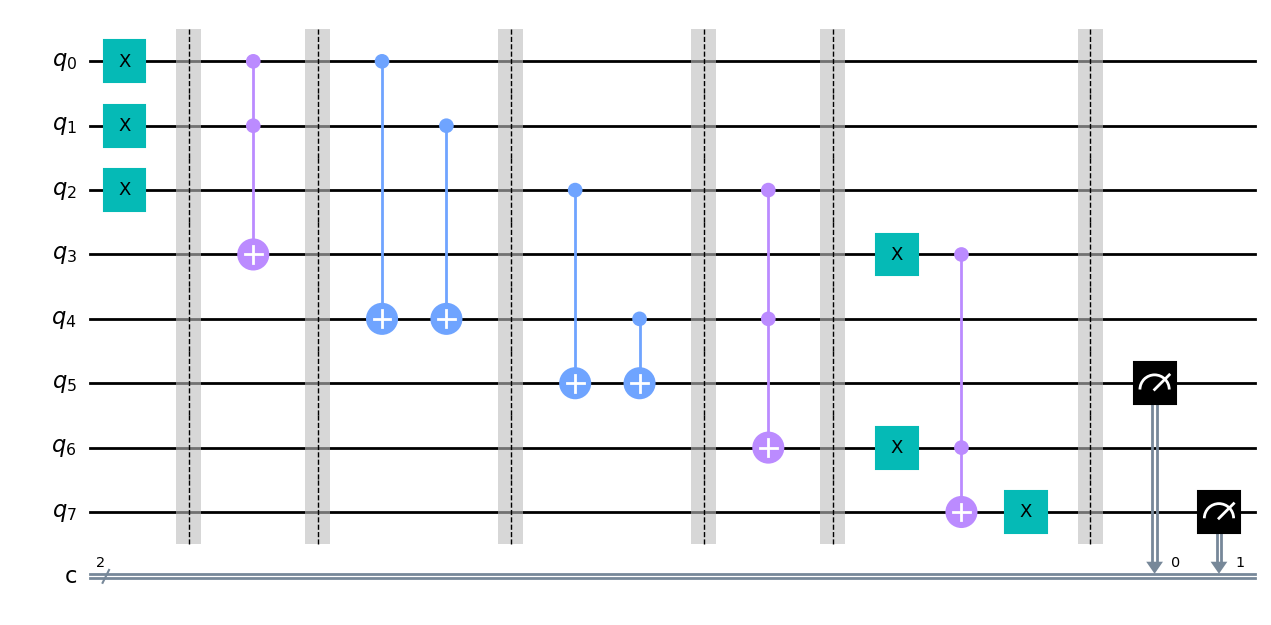

{'11': 1024}


In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

# Creating a circuit with 8 quantum bits and 2 classical bits
qc = QuantumCircuit(8,2)

# Preparing inputs
qc.x(0) # Comment this line to make Qbit0 = |0>
qc.x(1) # Comment this line to make Qbit1 = |0>
qc.x(2) # Comment this line to make Qbit2 = |0> ( carry-in bit )
qc.barrier()

# AND gate1 implementation
qc.ccx(0,1,3)
qc.barrier()

# OR gate1 implementation
qc.cx(0,4) 
qc.cx(1,4)
qc.barrier()

# OR gate2 implementation
qc.cx(2,5) 
qc.cx(4,5)
qc.barrier()

# AND gate2 implementation
qc.ccx(2,4,6)
qc.barrier()

# OR gate implementation
qc.x(3)
qc.x(6)
qc.ccx(3,6,7)
qc.x(7)
qc.barrier()

# Measuring and put result to classical bit
qc.measure(5,0) # ( sum )
qc.measure(7,1) # ( carry-out )
display(qc.draw(output='mpl'))

# Run the experimient 1024 times and get stats
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

In [9]:
qubitOp

PauliSumOp(SparsePauliOp(['IZIIZ', 'IZIZI', 'IZZII', 'ZIIIZ', 'ZIIZI', 'ZIZII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j]), coeff=1.0)